In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["font.family"] = 'Malgun Gothic'


In [2]:
# 다양한 형식의 연, 월, 일 표시 데이터
import pandas as pd
d_list = ["05/07/2024 11:12:13", "05-07-2024 11:22:23","2024-5-07 11:33:23", "2024/05/07"]
pd.DatetimeIndex(d_list)
pd.DatetimeIndex(d_list).year # 연도 값을 출력
pd.DatetimeIndex(d_list).month # 월 값을 출력
pd.DatetimeIndex(d_list).day #일 값을출력

Index([7, 7, 7, 7], dtype='int32')

### [실습]
* 기상 데이터 분석
* 2010년부터 10년간 울룽도 지역의 기온과 풍속을 측정한 데이터

In [3]:
# 데이터 셋 가져오기
!curl https://raw.githubusercontent.com/dongupak/BigDataAnalysis/main/weather.csv -O  weather.csv
weather = pd.read_csv("weather.csv", index_col = 0)
weather.head()


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 10 88955   10  9646    0     0   7579      0  0:00:11  0:00:01  0:00:10  7619
100 88955  100 88955    0     0  57976      0  0:00:01  0:00:01 --:--:-- 58216
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0curl: (6) Could not resolve host: weather.csv


,평균 기온,최대 풍속,평균 풍속
일시,,,
2010-08-01,28.7,8.3,3.4
2010-08-02,25.2,8.7,3.8
2010-08-03,22.1,6.3,2.9
2010-08-04,25.3,6.6,4.2
2010-08-05,27.2,9.1,5.6


In [4]:
weather.mean()

평균 기온    12.942102
최대 풍속     7.911099
평균 풍속     3.936441
dtype: float64

In [5]:
# 1. 전체 데이터에 대하여 최대 풍속의 최대값을 출력하시오.
weather['최대 풍속'].max()

26.0

In [6]:
# 2. 데이터 정제와 결측 값 처리
# 1. 전체 테이블의 크기
print(weather.size)
# 2. 개별적인 열의 개수 확인 
print(weather.count())
# 3. 결측치 탐지 및 처리
missing_data = weather[weather['평균 풍속'].isna()]
print(missing_data )
#1)
# weather.dropna(axis=0, how='any', inplace=True)

#2) 결측 값을 평균 풍속으로 채움, inplace를 True로 설정해 원본 데이터를 수정
weather.fillna(weather['평균 풍속'].mean(), inplace=True)
weather

10959
평균 기온    3653
최대 풍속    3649
평균 풍속    3647
dtype: int64
            평균 기온  최대 풍속  평균 풍속
일시                             
2012-02-11   -0.7    NaN    NaN
2012-02-12    0.4    NaN    NaN
2012-02-13    4.0    NaN    NaN
2015-03-22   10.1   11.6    NaN
2015-04-01    7.3   12.1    NaN
2019-04-18   15.7   11.7    NaN


,평균 기온,최대 풍속,평균 풍속
일시,,,
2010-08-01,28.7,8.3,3.4
2010-08-02,25.2,8.7,3.8
2010-08-03,22.1,6.3,2.9
2010-08-04,25.3,6.6,4.2
2010-08-05,27.2,9.1,5.6
...,...,...,...
2020-07-27,22.1,4.2,1.7
2020-07-28,21.9,4.5,1.6
2020-07-29,21.6,3.2,1.0


In [7]:
# 3. 평균 기온 열에서 어느 연도에  평균 기온이 가장 높았는지 연도별 평균 기온을 막대그래프로 그리기
weather.head()

,평균 기온,최대 풍속,평균 풍속
일시,,,
2010-08-01,28.7,8.3,3.4
2010-08-02,25.2,8.7,3.8
2010-08-03,22.1,6.3,2.9
2010-08-04,25.3,6.6,4.2
2010-08-05,27.2,9.1,5.6


In [8]:
# 3.1 
weather.reset_index(inplace=True)

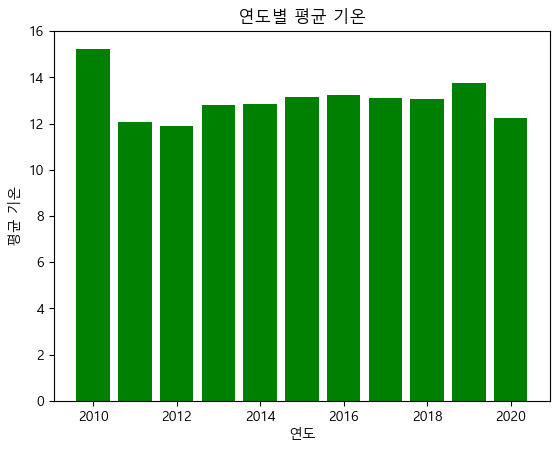

In [15]:
# 3.2 weather['일시']에서 연도 값을 추출하여 저장해서 데이터프레임에 추가하기
# year 속성을 사용하여 연별로 구분하여 평균 기온 값을 담기

weather['year'] = pd.DatetimeIndex(weather['일시']).year

yearly = [None for x in range(11)] # 연별로 구분된 10개의 None 값
yearly_temp =[0 for x in range(11)] # 연별 평균 기온을 담을 리스트

for i in range(11):
  yearly[i] = weather[weather['year'] == 2010+i]
  yearly_temp[i] = yearly[i]['평균 기온'].mean()

years = np.arange(2010,2021)

plt.bar(years, yearly_temp, color="green")
plt.xlabel('연도')
plt.ylabel('평균 기온')
plt.title("연도별 평균 기온")
plt.show()


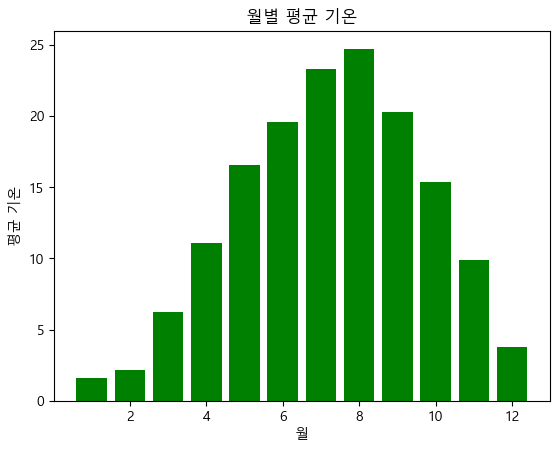

In [14]:
# 4. 어느 월에  평균 기온이 가장 높았는지 월별 평균 기온을 막대그래프로 그리기
# month 속성을 사용하여 달별로 구분하여 평균 기온 값을 담기
weather['month'] = pd.DatetimeIndex(weather['일시']).month

monthly = [None for x in range(12)] # 별로 구분된 12개의 None 값
monthly_temp =[0 for x in range(12)] # 월별 평균 풍속을 담을 리스트

for i in range(12):
  monthly[i] = weather[weather['month'] == i+1]
  monthly_temp[i] = monthly[i]['평균 기온'].mean()

months = np.arange(1,13)
plt.bar(months, monthly_temp, color="green")
plt.xlabel('월')
plt.ylabel('평균 기온')
plt.title("월별 평균 기온")
plt.show()


In [16]:
# 5. 데이터 분석을 할 때는 특정한 값에 기반하여 데이터를 그룹으로 묶는 일이 많다.
weather.head()

,일시,평균 기온,최대 풍속,평균 풍속,year,month
0,2010-08-01,28.7,8.3,3.4,2010,8
1,2010-08-02,25.2,8.7,3.8,2010,8
2,2010-08-03,22.1,6.3,2.9,2010,8
3,2010-08-04,25.3,6.6,4.2,2010,8
4,2010-08-05,27.2,9.1,5.6,2010,8


In [17]:
# 기상 정보를 월별로 분석하기
## 데이터가 속한 달을 판단해 새로운 열로 만들고, 이 열을 기준으로 데이터를 묶어 평균값 구하기
# weather['month'] = pd.DatetimeIndex(weather['일시']).month

monthly_means = weather.groupby('month')[['평균 기온','최대 풍속', '평균 풍속']].mean()
monthly_means

,평균 기온,최대 풍속,평균 풍속
month,,,
1,1.598387,8.158065,3.757419
2,2.136396,8.179892,3.946676
3,6.250323,8.871935,4.388827
4,11.064667,9.287121,4.617910
5,16.564194,8.548710,4.219355
6,19.616667,6.945667,3.461000
7,23.328387,7.322581,3.877419
8,24.748710,6.853226,3.596129
9,20.323667,6.896333,3.661667


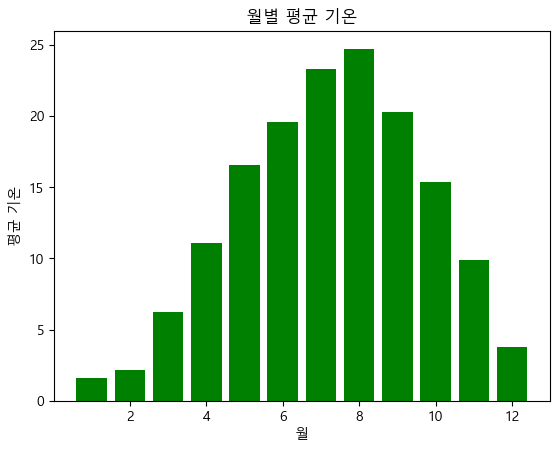

In [18]:
plt.bar(np.arange(1,13), monthly_means['평균 기온'], color="green")
plt.xlabel('월')
plt.ylabel('평균 기온')
plt.title("월별 평균 기온")
plt.show()

In [19]:
# 6. 기상 정보를 연도별로 분석하기
# weather['year'] = pd.DatetimeIndex(weather['일시']).year
yearly_means = weather.groupby('year')[['평균 기온','최대 풍속', '평균 풍속']].mean()
yearly_means

,평균 기온,최대 풍속,평균 풍속
year,,,
2010,15.238562,8.205229,4.069281
2011,12.073425,8.355616,4.251233
2012,11.892896,7.762867,3.864506
2013,12.795068,7.859726,3.874795
2014,12.844110,7.458904,3.816438
2015,13.162466,7.694247,3.800200
2016,13.243443,7.963934,3.977869
2017,13.111233,8.001370,3.934795
2018,13.041644,8.158630,4.085479


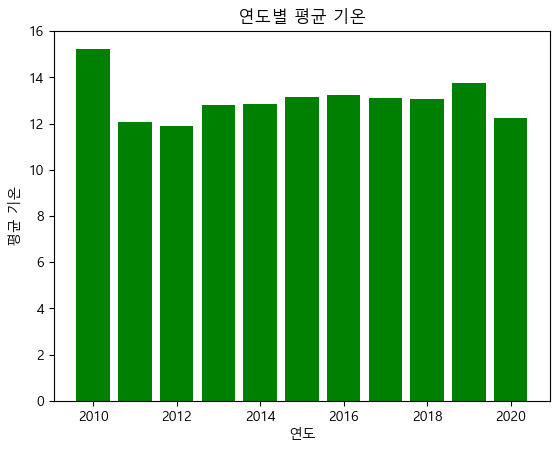

In [20]:
plt.bar(np.arange(2010,2021), yearly_means['평균 기온'], color="green")
plt.xlabel('연도')
plt.ylabel('평균 기온')
plt.title("연도별 평균 기온")
plt.show()

In [21]:
# 필터링 : 특정한 조건 값을 주어서 데이터프레임의 값을 필터링하기
# 7. 평균 풍속이 4.0이 넘는 달만 추출하기
weather.head()

,일시,평균 기온,최대 풍속,평균 풍속,year,month
0,2010-08-01,28.7,8.3,3.4,2010,8
1,2010-08-02,25.2,8.7,3.8,2010,8
2,2010-08-03,22.1,6.3,2.9,2010,8
3,2010-08-04,25.3,6.6,4.2,2010,8
4,2010-08-05,27.2,9.1,5.6,2010,8


In [22]:
# weather[weather['평균 풍속'] >= 4.0]
monthly_means.head()
monthly_means[monthly_means['평균 풍속'] >= 4.0]

,평균 기온,최대 풍속,평균 풍속
month,,,
3,6.250323,8.871935,4.388827
4,11.064667,9.287121,4.617910
5,16.564194,8.548710,4.219355


Text(0, 0.5, '빈도수')

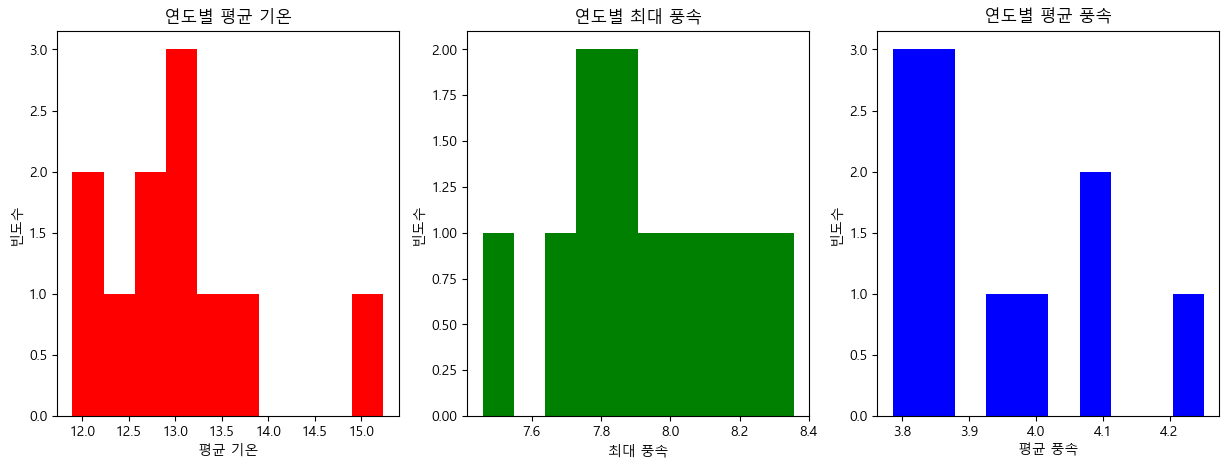

In [23]:
# 8. '평균 기온', '최대 풍속', '평균 풍속'을 하나의 히스트그램으로 출력하시오.
# groupby()와 DatetimeIndex().year을 사용

# Calculate the yearly means
#yearly_means = weather.groupby('year')[['평균 기온', '최대 풍속', '평균 풍속']].mean()

# 히스토그램 그리기
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the histogram for average temperature
axs[0].hist(yearly_means['평균 기온'], bins=10, color = "red")
axs[0].set_title("연도별 평균 기온")
axs[0].set_xlabel("평균 기온")
axs[0].set_ylabel("빈도수")


# Plot the histogram for maximum wind speed
axs[1].hist(yearly_means['최대 풍속'], bins=10, color="green")
axs[1].set_title("연도별 최대 풍속")
axs[1].set_xlabel("최대 풍속")
axs[1].set_ylabel("빈도수")

# Plot the histogram for average wind speed
axs[2].hist(yearly_means['평균 풍속'], bins=10, color="blue")
axs[2].set_title("연도별 평균 풍속")
axs[2].set_xlabel("평균 풍속")
axs[2].set_ylabel("빈도수")


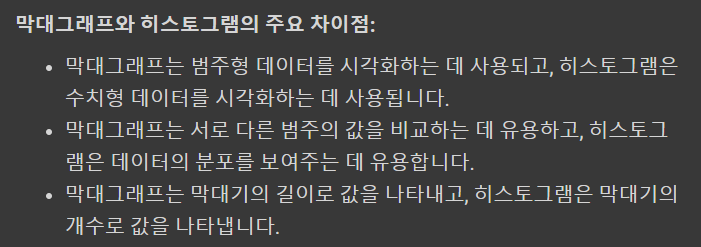

In [19]:
# 히스토그램 사용 예
import matplotlib.pyplot as plt

# 임의의 데이터 생성
data = np.random.randn(1000)

# 히스토그램 그리기
# plt.hist(data)
plt.hist(data, bins=20) #기본 구간 10개 대신 구간 20개로 히스토그램

# 레이블과 제목 추가
plt.xlabel("값")
plt.ylabel("빈도")
plt.title("임의 데이터의 히스토그램")

# 그래프 표시
plt.show()

NameError: name 'np' is not defined

Text(0, 0.5, 'freq')

C:\Users\Book\python_basic\venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)


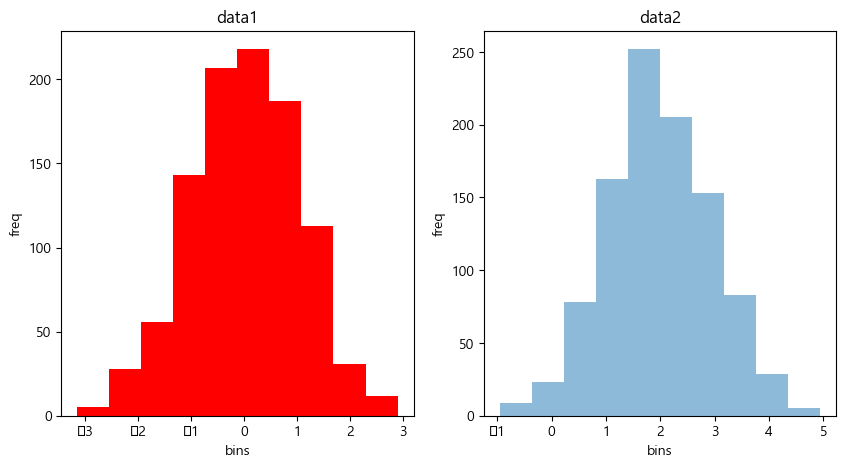

In [25]:
# 한 그림에 여러 개의 히스토그램 그리기:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

data1 = np.random.randn(1000)
data2 = np.random.randn(1000) + 2

axs[0].hist(data1, bins=10, color = "red", label="data2")
axs[0].set_title("data1")
axs[0].set_xlabel("bins")
axs[0].set_ylabel("freq")

axs[1].hist(data2, bins=10, alpha=0.5, label="data 1")
axs[1].set_title("data2")
axs[1].set_xlabel("bins")
axs[1].set_ylabel("freq")

# [2차 프로그래밍 문제]
* 제출날짜: 2024-05-14까지 ipynb 소스자료 업로드하기
* cyber캠퍼스와 깃허브에 올리기
* 실습에서 사용한 weather.csv 파일을 판다스를 이용하여 데이터프레임을 만들어 다음과 같이 처리한다.

## 1) 이 데이터셋의 앞 3개 행과 마지막 3개의 행을 화면에 출력하시오.

In [2]:
import pandas as pd

df = pd.read_csv('weather.csv')

print("처음 3개 행:")
print(df.head(3))

print("\n마지막 3개 행:")
print(df.tail(3))


처음 3개 행:
           일시  평균 기온  최대 풍속  평균 풍속
0  2010-08-01   28.7    8.3    3.4
1  2010-08-02   25.2    8.7    3.8
2  2010-08-03   22.1    6.3    2.9

마지막 3개 행:
              일시  평균 기온  최대 풍속  평균 풍속
3650  2020-07-29   21.6    3.2    1.0
3651  2020-07-30   22.9    9.7    2.4
3652  2020-07-31   25.7    4.8    2.5


## 2) 2015년 6월 6일의 "평균 기온"과 "풍속 정보"를 출력하시오


In [7]:
import pandas as pd

df = pd.read_csv('weather.csv')

df['일시'] = pd.to_datetime(df['일시'])

specific_date = df[df['일시'] == '2015-06-06']

print(specific_date[['평균 기온', '평균 풍속', '최대 풍속']])


      평균 기온  평균 풍속  최대 풍속
1770   16.6    1.9    4.4


## 3) 가장 무더웠던 날짜을 추출해서 이 날의 기상 데이터을 출력하시오.

In [10]:
import pandas as pd

df = pd.read_csv('weather.csv')

max_temp = df['평균 기온'].max()

hottest_day = df[df['평균 기온'] == max_temp]

hottest_day

,일시,평균 기온,최대 풍속,평균 풍속
1103,2013-08-08,31.3,7.8,4.6


## 4) "평균 기온"이 30도를 넘는 날짜들을 찾아, 이 날의 기상 데이터를 출력하시오.

In [11]:
import pandas as pd

df = pd.read_csv('weather.csv')

hot_days = df[df['평균 기온'] > 30]

hot_days


,일시,평균 기온,최대 풍속,평균 풍속
1103,2013-08-08,31.3,7.8,4.6
1104,2013-08-09,30.6,9.9,6.4
1105,2013-08-10,30.6,7.4,3.8
2913,2018-07-23,30.5,6.5,1.6
2925,2018-08-04,30.3,5.8,3.0


## 5) 연도별 "평균 기온"의 평균에 대한 추이를 선 그래프로 그리시오.

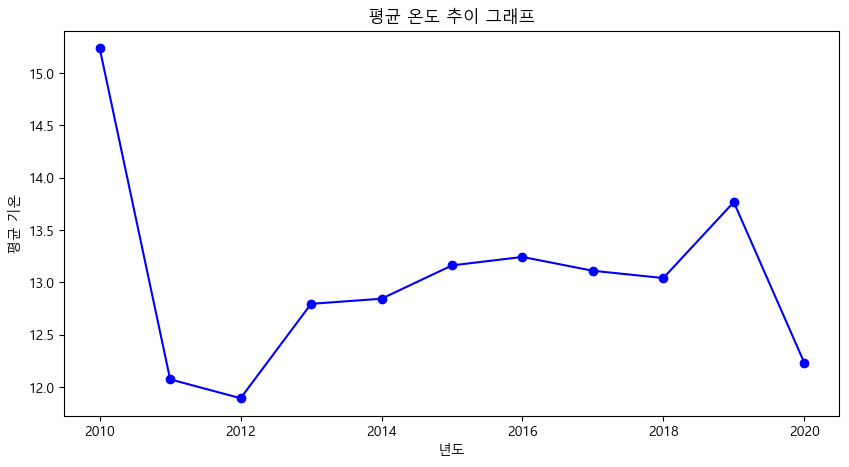

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

df = pd.read_csv('weather.csv')

df['일시'] = pd.to_datetime(df['일시'])

yearly_avg_temp = df.groupby(df['일시'].dt.year)['평균 기온'].mean()

plt.figure(figsize=(10, 5))
plt.plot(yearly_avg_temp, marker='o', linestyle='-', color='b')
plt.title("평균 온도 추이 그래프")
plt.xlabel("년도")
plt.ylabel("평균 기온")
plt.show()


## 6) 연도별 "최대 풍속"의 평균을 막대 그래프로 그리시오.

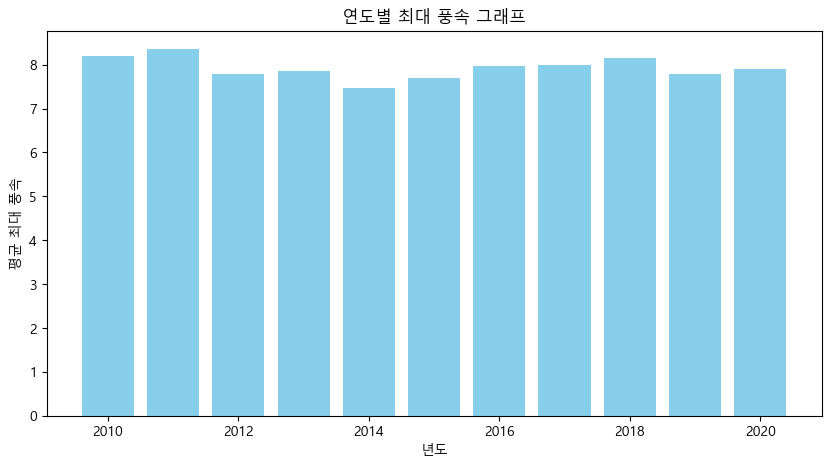

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('weather.csv')

df['일시'] = pd.to_datetime(df['일시'])

yearly_avg_max_wind = df.groupby(df['일시'].dt.year)['최대 풍속'].mean()

plt.figure(figsize=(10, 5))
plt.bar(yearly_avg_max_wind.index, yearly_avg_max_wind.values, color='skyblue')
plt.title('연도별 최대 풍속 그래프')
plt.xlabel('년도')
plt.ylabel('평균 최대 풍속')
plt.show()


## 7) 연도별 "평균 풍속"의 합을 히스토그램 그래프로 그리시오


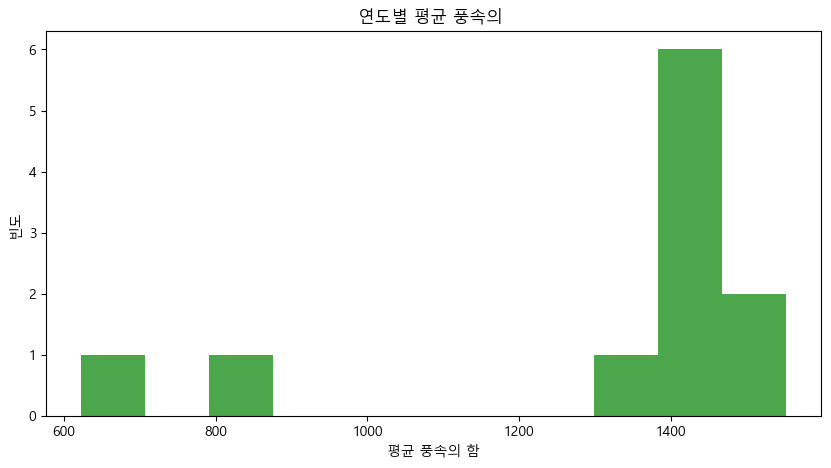

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('weather.csv')

df['일시'] = pd.to_datetime(df['일시'])

yearly_sum_avg_wind = df.groupby(df['일시'].dt.year)['평균 풍속'].sum()

plt.figure(figsize=(10, 5))
plt.hist(yearly_sum_avg_wind, bins=len(yearly_sum_avg_wind), color='green', alpha=0.7)
plt.title('연도별 평균 풍속의 ')
plt.xlabel('평균 풍속의 함')
plt.ylabel('빈도')
plt.show()


## 8) 2015년과 2016년의 "평균 기온"의 평균을 비교하여 어느 해가 더 더웠는지 출력하시오.

In [27]:
import pandas as pd

df = pd.read_csv('weather.csv')

df['일시'] = pd.to_datetime(df['일시'])

yearly_avg_temps = df.groupby(df['일시'].dt.year)['평균 기온'].mean()

avg_temp_2015 = yearly_avg_temps.get(2015, None)
avg_temp_2016 = yearly_avg_temps.get(2016, None)

if avg_temp_2015 is not None and avg_temp_2016 is not None:
    if avg_temp_2015 > avg_temp_2016:
        print("2015년이 2016년보다 더 더웠습니다.")
    elif avg_temp_2015 < avg_temp_2016:
        print("2016년이 2015년보다 더 더웠습니다.")
    else:
        print("2015년과 2016년의 평균 기온이 같습니다.")
else:
    print("데이터셋에 2015년 혹은 2016년의 데이터가 부족합니다.")


2016년이 2015년보다 더 더웠습니다.


## 9) 월별 "평균 기온" 의 합이 가장 적은 달과 가장 많은 달을 출력하시오.

In [30]:
import pandas as pd

df = pd.read_csv('weather.csv')

df['일시'] = pd.to_datetime(df['일시'])

monthly_sum_temps = df.groupby(df['일시'].dt.month)['평균 기온'].sum()

coldest_month = monthly_sum_temps.idxmin()
warmest_month = monthly_sum_temps.idxmax()

print(f"월별 평균 기온의 합이 가장 적은 달: {coldest_month}월")
print(f"월별 평균 기온의 합이 가장 많은 달: {warmest_month}월")

월별 평균 기온의 합이 가장 적은 달: 1월
월별 평균 기온의 합이 가장 많은 달: 8월


## 10) 연도별 "최대 풍속"의 평균이 가장 큰 연도을 출력하시오.